## Data Cleaning (sorting,rearranging)
### Here we have 12 seperate CSV files of Sales spread across months.
### The objective is to combine them into a single CSV file and perform Data Cleaning on it using Python.We will also add,remove columns as per convenience to get the desired result.

In [1]:
## importing libraries 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

### Merging the 12 months of sales data into a single CSV file

In [2]:
# Single file reads
df = pd.read_csv('C:\\Users\\vishal rana\\Downloads\\Sales_Data\\Sales_January_2019.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
## We run a LIST COMPREHENSION here to get all the files 

files = [ files for files in os.listdir('./Sales_Data')] ## List Comprehension

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
 ## here we run a for loop to read the files and  concat  them imto the empty dataframe all_months
files = [ files for files in os.listdir('./Sales_Data')]

all_months= pd.DataFrame()
    
for file in files:
    df= pd.read_csv('./Sales_Data/'+file)
    all_months = pd.concat([all_months,df])

    
all_months.to_csv('all_data.csv', index= False)

In [6]:
df= pd.read_csv('all_data.csv') ## This is the combined CSV having all the data of 12 csvs
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Basic exploration to understand the type of data we are dealing with

In [7]:
## Give us info about datatype and  non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
## shape of the table
df.shape

(186850, 6)

In [9]:
## checking for Null values

df.isna().sum()


Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
## We can see that we have 545 records that are null. We will make  a dataframe for null values.

null_df = df[df.isna().any(axis= 1)]
null_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## we observe that for each record every column is NaN value. We will drop the Nan values here.
df = df.dropna(how='all')

In [12]:
## checking for Nan after dropping the records.
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [13]:
## Now we want to have a month column so that we can later group by month and get results.
df['Month']= df['Order Date'].loc[0:].str[0:2]

In [14]:
## Now that we have Month Column we wanted to convert into int datatype but it throws an error of 'Or'.Means we are having "Or" 
## in tge month column
df['Month']= df['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [15]:
## checking for records with 'Or'
temp_df= df[df['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [16]:
## Here we assigning our datframe as df where order date is not equal to 'Or'
df= df[df['Order Date'].str[0:2] != 'Or']

In [17]:
## Finally we can change our Month to Int datatype
df['Month']= df['Month'].astype('int32')

In [18]:
## Check the datatype of Month but we see that we need to change the datatype of attributes Quantity Ordered,Price.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


In [19]:
## Using pd.to_numeric to change which will automatically assign a datatype without us having to mention it.
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'])
df['Price Each']= pd.to_numeric(df['Price Each'])


In [20]:
## check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 10.6+ MB


In [21]:
## Here we have Quantity Ordered and Price Each but Sale is not present. So we will add another column as 
## sales=(Quantity Ordered*Price Eac)
df['Sales']= df['Quantity Ordered']*df['Price Each']

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [23]:
## Now we want to extract city and state from Purchase addresses. So we use the str function to get state.
state = df['Purchase Address'].str.split(',').str[1]
state

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [24]:
## we get the State such as TX,MA,CA
Count= df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]
Count

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
186845    CA
186846    CA
186847    CA
186848    CA
186849    CA
Name: Purchase Address, Length: 185950, dtype: object

In [25]:
## Now we create another column as City by adding state and count.
df['City']= state + ' '+Count

In [26]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [27]:
## Now we want to extract hour and minutes from order date.

df['Order Date']= pd.to_datetime(df['Order Date']) ## convert imto datetime


In [28]:
## after converting we add column as Hour and Minutes
df['Hour'] = df['Order Date'].dt.hour
df['Minutes'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minutes
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


## Now that we have our data organised and sorted, we canproceed to analyse data.

In [29]:
## AS stated earlier here we group by Month column we added to find the best month for sales?
df.groupby('Month').sum().sort_values(by = 'Sales',ascending=False)

,Quantity Ordered,Price Each,Sales,Hour,Minutes
Month,,,,,
12,28114,4588415.41,4613443.34,359978,733082
10,22703,3715554.83,3736726.88,290650,598437
4,20558,3367671.02,3390670.24,262259,544186
11,19798,3180600.68,3199603.20,254865,518231
5,18667,3135125.13,3152606.75,238780,487899
3,17005,2791207.83,2807100.38,218969,447559
7,16072,2632539.56,2647775.76,206169,417349
6,15253,2562025.61,2577802.26,195528,402436
8,13448,2230345.42,2244467.88,172289,353857


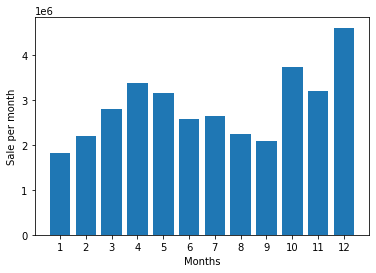

In [30]:
## We can plot the Bar graph for best month
best_month= df.groupby('Month').sum()
months= range(1,13)

plt.bar(months,best_month['Sales'])
plt.xticks(months)

plt.xlabel('Months')
plt.ylabel('Sale per month');

In [31]:
## which city is best in sales?
best_city = df.groupby('City').sum().sort_values(by = 'Sales',ascending= False)
best_city

,Quantity Ordered,Price Each,Month,Sales,Hour,Minutes
City,,,,,,
San Francisco CA,50239,8211461.74,315520,8262203.91,643265,1319477
Los Angeles CA,33289,5421435.23,208325,5452570.80,427444,866638
New York City NY,27932,4635370.83,175741,4664317.43,357696,733598
Boston MA,22528,3637409.77,141112,3661642.01,288225,590442
Atlanta GA,16602,2779908.20,104794,2795498.58,214264,442932
Dallas TX,16730,2752627.82,104620,2767975.40,214390,435155
Seattle WA,16553,2733296.01,104941,2747755.48,213292,436368
Portland OR,11303,1860558.22,70621,1870732.34,144421,295533
Austin TX,11153,1809873.61,69829,1819581.75,141946,289060


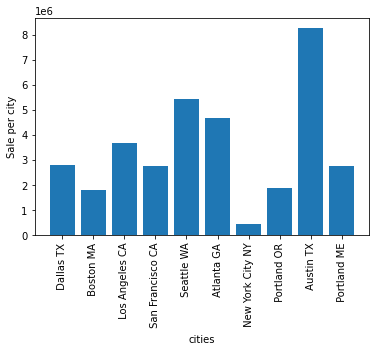

In [32]:
## plot bar graph for best_city
best_city= df.groupby('City').sum()
cities = df['City'].unique()

plt.bar(cities,best_city['Sales'])
plt.xticks(cities,rotation = 'vertical',size= 10)

plt.xlabel('cities')
plt.ylabel('Sale per city');


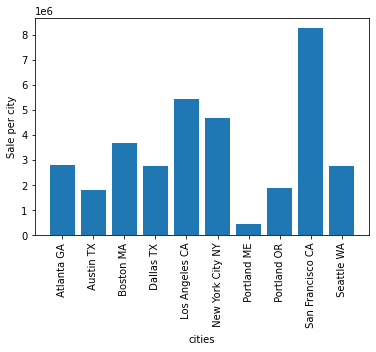

In [33]:
## We realise that in previous graoh we are getting a different result as copared to the table. For table San Francisco CA 
# was the highest but graph shows Austin TX
best_city= df.groupby('City').sum()
cities = [city for city, df in df.groupby('City') ] ## This was the reason as cities were not ordered in same manner as as 
                                                    ##  the group by

plt.bar(cities,best_city['Sales'])
plt.xticks(cities,rotation = 'vertical',size= 10)

plt.xlabel('cities')
plt.ylabel('Sale per city');

In [34]:
## what is the  Peak time when sales is at peak?
best_time= df.groupby ('Hour').count().loc[0:,'Sales']

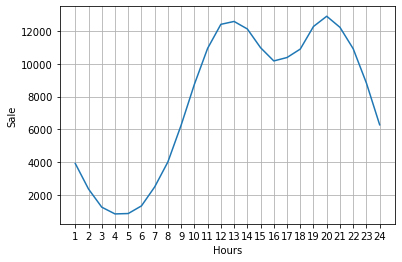

In [35]:
hours= range(1,25)
plt.plot(hours,best_time)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Sale')
plt.grid()

## So here we conclude the Data Cleaning Process. We Got some good insights after the data was cleaned,sorted and arranged in a proper manner.